In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Single Action Class)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"  # base Task_B folder

action_class = "Fielding"  # Change to "Bowling" / "Fielding" / "Umpire"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point ImageFolder to *only* the action class folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/{action_class}", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/{action_class}", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/{action_class}", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Training only on: {action_class}")
print("Train classes:", train_ds.classes)
print("Train samples:", len(train_ds), 
      "Val samples:", len(val_ds), 
      "Test samples:", len(test_ds))

Training only on: Fielding
Train classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Train samples: 1917 Val samples: 504 Test samples: 630


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 1917
Total validation images: 504
Total test images: 630
Total images in dataset: 3051


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 1704
Validation images (excluding 'random_occlusion'): 448
Test images (excluding 'random_occlusion'): 560
Total images (excluding 'random_occlusion'): 2712


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'low_resolution', 'blur', 'original', 'random_occlusion', 'lens_flare'}
Validation folders considered: {'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'low_resolution', 'blur', 'original', 'random_occlusion', 'lens_flare'}
Test folders considered: {'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'low_resolution', 'blur', 'original', 'random_occlusion', 'lens_flare'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Fielding", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Fielding", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Fielding", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Final Training images: 1704
Final Validation images: 448
Final Test images: 560
Total images after filtering: 2712


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'low_resolution', 'blur', 'original', 'lens_flare'}
Validation folders considered: {'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'low_resolution', 'blur', 'original', 'lens_flare'}
Test folders considered: {'gaussian_noise', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'low_resolution', 'blur', 'original', 'lens_flare'}


In [7]:
# -----------------------------
# 2. Define InceptionNetV3 Model from Scratch (CORRECTED)
# -----------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time

class BasicConv2d(nn.Module):
    """Basic convolution block: Conv2d + BatchNorm + ReLU"""
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, 
                             stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

class InceptionA(nn.Module):
    """Inception-A block (35x35 grid)"""
    def __init__(self, in_channels, pool_features):
        super().__init__()
        # Branch 1: 1x1 conv
        self.branch1x1 = BasicConv2d(in_channels, 64, kernel_size=1)
        
        # Branch 2: 1x1 conv -> 5x5 conv
        self.branch5x5_1 = BasicConv2d(in_channels, 48, kernel_size=1)
        self.branch5x5_2 = BasicConv2d(48, 64, kernel_size=5, padding=2)
        
        # Branch 3: 1x1 conv -> 3x3 conv -> 3x3 conv
        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, padding=1)
        
        # Branch 4: avg pool -> 1x1 conv
        self.branch_pool = BasicConv2d(in_channels, pool_features, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class InceptionB(nn.Module):
    """Inception-B block (17x17 grid)"""
    def __init__(self, in_channels):
        super().__init__()
        # Branch 1: 1x1 conv
        self.branch1x1 = BasicConv2d(in_channels, 192, kernel_size=1)
        
        # Branch 2: 1x1 conv -> 1x7 conv -> 7x1 conv
        self.branch7x7_1 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.branch7x7_2 = BasicConv2d(128, 128, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7_3 = BasicConv2d(128, 192, kernel_size=(7, 1), padding=(3, 0))
        
        # Branch 3: 1x1 conv -> 7x1 conv -> 1x7 conv -> 7x1 conv -> 1x7 conv
        self.branch7x7dbl_1 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.branch7x7dbl_2 = BasicConv2d(128, 128, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_3 = BasicConv2d(128, 128, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7dbl_4 = BasicConv2d(128, 128, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_5 = BasicConv2d(128, 192, kernel_size=(1, 7), padding=(0, 3))
        
        # Branch 4: avg pool -> 1x1 conv
        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)
        
        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
        return torch.cat(outputs, 1)

class InceptionC(nn.Module):
    """Inception-C block (8x8 grid)"""
    def __init__(self, in_channels):
        super().__init__()
        # Branch 1: 1x1 conv
        self.branch1x1 = BasicConv2d(in_channels, 320, kernel_size=1)
        
        # Branch 2: 1x1 conv -> split into 1x3 and 3x1 convs
        self.branch3x3_1 = BasicConv2d(in_channels, 384, kernel_size=1)
        self.branch3x3_2a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3_2b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))
        
        # Branch 3: 1x1 conv -> 3x3 conv -> split into 1x3 and 3x1 convs
        self.branch3x3dbl_1 = BasicConv2d(in_channels, 448, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(448, 384, kernel_size=3, padding=1)
        self.branch3x3dbl_3a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3dbl_3b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))
        
        # Branch 4: avg pool -> 1x1 conv
        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)
        
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class ReductionA(nn.Module):
    """Reduction A block (35x35 to 17x17)"""
    def __init__(self, in_channels):
        super().__init__()
        self.branch3x3 = BasicConv2d(in_channels, 384, kernel_size=3, stride=2)
        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3(x)
        
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
        
        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
        
        outputs = [branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class ReductionB(nn.Module):
    """Reduction B block (17x17 to 8x8)"""
    def __init__(self, in_channels):
        super().__init__()
        self.branch3x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
        self.branch3x3_2 = BasicConv2d(192, 320, kernel_size=3, stride=2)
        self.branch7x7x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
        self.branch7x7x3_2 = BasicConv2d(192, 192, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7x3_3 = BasicConv2d(192, 192, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7x3_4 = BasicConv2d(192, 192, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        
        branch7x7x3 = self.branch7x7x3_1(x)
        branch7x7x3 = self.branch7x7x3_2(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_3(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_4(branch7x7x3)
        
        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
        
        outputs = [branch3x3, branch7x7x3, branch_pool]
        return torch.cat(outputs, 1)

class InceptionAux(nn.Module):
    """Auxiliary classifier for InceptionV3"""
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.conv0 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.conv1 = BasicConv2d(128, 768, kernel_size=5)
        self.fc = nn.Linear(768, num_classes)
        
    def forward(self, x):
        # N x 768 x 17 x 17
        x = F.avg_pool2d(x, kernel_size=5, stride=3)
        # N x 768 x 5 x 5
        x = self.conv0(x)
        # N x 128 x 5 x 5
        x = self.conv1(x)
        # N x 768 x 1 x 1
        x = F.adaptive_avg_pool2d(x, (1, 1))
        # N x 768 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 768
        x = self.fc(x)
        # N x num_classes
        return x

class MyInceptionNetV3(nn.Module):
    """InceptionNetV3 Implementation from Scratch"""
    def __init__(self, num_classes=4, aux_logits=True, transform_input=False):
        super().__init__()
        self.aux_logits = aux_logits
        self.transform_input = transform_input
        
        # Initial convolution layers
        self.Conv2d_1a_3x3 = BasicConv2d(3, 32, kernel_size=3, stride=2)
        self.Conv2d_2a_3x3 = BasicConv2d(32, 32, kernel_size=3)
        self.Conv2d_2b_3x3 = BasicConv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.Conv2d_3b_1x1 = BasicConv2d(64, 80, kernel_size=1)
        self.Conv2d_4a_3x3 = BasicConv2d(80, 192, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        # Inception blocks
        self.Mixed_5b = InceptionA(192, pool_features=32)
        self.Mixed_5c = InceptionA(256, pool_features=64)
        self.Mixed_5d = InceptionA(288, pool_features=64)
        
        # Reduction A (CORRECTED)
        self.Mixed_6a = ReductionA(288)
        
        self.Mixed_6b = InceptionB(768)
        self.Mixed_6c = InceptionB(768)
        self.Mixed_6d = InceptionB(768)
        self.Mixed_6e = InceptionB(768)
        
        # Auxiliary classifier
        if aux_logits:
            self.AuxLogits = InceptionAux(768, num_classes)
        
        # Reduction B (CORRECTED)
        self.Mixed_7a = ReductionB(768)
        
        self.Mixed_7b = InceptionC(1280)
        self.Mixed_7c = InceptionC(2048)
        
        # Final layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(2048, num_classes)
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights using appropriate methods"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        
        # N x 3 x 299 x 299
        x = self.Conv2d_1a_3x3(x)
        # N x 32 x 149 x 149
        x = self.Conv2d_2a_3x3(x)
        # N x 32 x 147 x 147
        x = self.Conv2d_2b_3x3(x)
        # N x 64 x 147 x 147
        x = self.maxpool1(x)
        # N x 64 x 73 x 73
        x = self.Conv2d_3b_1x1(x)
        # N x 80 x 73 x 73
        x = self.Conv2d_4a_3x3(x)
        # N x 192 x 71 x 71
        x = self.maxpool2(x)
        # N x 192 x 35 x 35
        x = self.Mixed_5b(x)
        # N x 256 x 35 x 35
        x = self.Mixed_5c(x)
        # N x 288 x 35 x 35
        x = self.Mixed_5d(x)
        # N x 288 x 35 x 35
        x = self.Mixed_6a(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6b(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6c(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6d(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6e(x)
        # N x 768 x 17 x 17
        
        aux_logits = None
        if self.aux_logits and self.training:
            aux_logits = self.AuxLogits(x)
        
        # N x 768 x 17 x 17
        x = self.Mixed_7a(x)
        # N x 1280 x 8 x 8
        x = self.Mixed_7b(x)
        # N x 2048 x 8 x 8
        x = self.Mixed_7c(x)
        # N x 2048 x 8 x 8
        x = self.avgpool(x)
        # N x 2048 x 1 x 1
        x = self.dropout(x)
        # N x 2048 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 2048
        x = self.fc(x)
        # N x num_classes
        
        if self.aux_logits and self.training:
            return x, aux_logits
        return x

In [8]:
# -----------------------------
# 3. Training Setup
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyInceptionNetV3(num_classes=len(classes), aux_logits=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("InceptionNetV3 Model Summary:")
# Note: Input size should be 299x299 for InceptionV3
try:
    summary(model, (3, 299, 299))
except:
    print("Model summary generation failed - this is normal for complex architectures")
    print(f"Model created successfully with {sum(p.numel() for p in model.parameters()):,} parameters")

InceptionNetV3 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
         


🚀 Starting InceptionNetV3 Training for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:47<00:00,  1.13it/s, Loss=1.9260, Acc=0.4208]


✅ Training completed in 47.62s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:07<00:00,  1.89it/s, Loss=3.4375, Acc=0.2522]


✅ Validation completed in 7.41s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.2522

📊 Epoch 1 Summary:
│ Train Loss: 1.9260 | Train Acc: 0.4208
│ Val Loss:   3.4375 | Val Acc:   0.2522
│ Train Time: 47.62s | Val Time: 7.41s
│ Total Epoch Time: 55.04s
│ Best Val Acc: 0.2522 (Epoch 1)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:37<00:00,  1.42it/s, Loss=1.3378, Acc=0.6068]


✅ Training completed in 37.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.73it/s, Loss=1.6010, Acc=0.4777]


✅ Validation completed in 5.12s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.4777

📊 Epoch 2 Summary:
│ Train Loss: 1.3378 | Train Acc: 0.6068
│ Val Loss:   1.6010 | Val Acc:   0.4777
│ Train Time: 37.92s | Val Time: 5.12s
│ Total Epoch Time: 43.05s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:39<00:00,  1.37it/s, Loss=0.9486, Acc=0.7271]


✅ Training completed in 39.29s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.61it/s, Loss=3.2879, Acc=0.4286]


✅ Validation completed in 5.36s

📊 Epoch 3 Summary:
│ Train Loss: 0.9486 | Train Acc: 0.7271
│ Val Loss:   3.2879 | Val Acc:   0.4286
│ Train Time: 39.29s | Val Time: 5.36s
│ Total Epoch Time: 44.66s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.8547, Acc=0.7565]


✅ Training completed in 42.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.61it/s, Loss=2.3212, Acc=0.4509]


✅ Validation completed in 5.37s

📊 Epoch 4 Summary:
│ Train Loss: 0.8547 | Train Acc: 0.7565
│ Val Loss:   2.3212 | Val Acc:   0.4509
│ Train Time: 42.05s | Val Time: 5.37s
│ Total Epoch Time: 47.42s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.5026, Acc=0.8662]


✅ Training completed in 41.32s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.59it/s, Loss=2.2297, Acc=0.4397]


✅ Validation completed in 5.40s

📊 Epoch 5 Summary:
│ Train Loss: 0.5026 | Train Acc: 0.8662
│ Val Loss:   2.2297 | Val Acc:   0.4397
│ Train Time: 41.32s | Val Time: 5.40s
│ Total Epoch Time: 46.73s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.3263, Acc=0.9049]


✅ Training completed in 41.78s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=2.3602, Acc=0.4621]


✅ Validation completed in 5.32s

📊 Epoch 6 Summary:
│ Train Loss: 0.3263 | Train Acc: 0.9049
│ Val Loss:   2.3602 | Val Acc:   0.4621
│ Train Time: 41.78s | Val Time: 5.32s
│ Total Epoch Time: 47.11s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.3490, Acc=0.9096]


✅ Training completed in 41.33s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.61it/s, Loss=2.5635, Acc=0.4442]


✅ Validation completed in 5.36s

📊 Epoch 7 Summary:
│ Train Loss: 0.3490 | Train Acc: 0.9096
│ Val Loss:   2.5635 | Val Acc:   0.4442
│ Train Time: 41.33s | Val Time: 5.36s
│ Total Epoch Time: 46.69s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.2938, Acc=0.9149]


✅ Training completed in 41.63s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.55it/s, Loss=2.7331, Acc=0.4107]


✅ Validation completed in 5.50s

📊 Epoch 8 Summary:
│ Train Loss: 0.2938 | Train Acc: 0.9149
│ Val Loss:   2.7331 | Val Acc:   0.4107
│ Train Time: 41.63s | Val Time: 5.50s
│ Total Epoch Time: 47.13s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.1991, Acc=0.9431]


✅ Training completed in 41.98s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.56it/s, Loss=3.0346, Acc=0.4754]


✅ Validation completed in 5.47s

📊 Epoch 9 Summary:
│ Train Loss: 0.1991 | Train Acc: 0.9431
│ Val Loss:   3.0346 | Val Acc:   0.4754
│ Train Time: 41.98s | Val Time: 5.47s
│ Total Epoch Time: 47.45s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.2792, Acc=0.9296]


✅ Training completed in 41.89s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=3.2268, Acc=0.4286]


✅ Validation completed in 5.39s

📊 Epoch 10 Summary:
│ Train Loss: 0.2792 | Train Acc: 0.9296
│ Val Loss:   3.2268 | Val Acc:   0.4286
│ Train Time: 41.89s | Val Time: 5.39s
│ Total Epoch Time: 47.29s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.1869, Acc=0.9548]


✅ Training completed in 41.47s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.56it/s, Loss=2.7008, Acc=0.4643]


✅ Validation completed in 5.46s

📊 Epoch 11 Summary:
│ Train Loss: 0.1869 | Train Acc: 0.9548
│ Val Loss:   2.7008 | Val Acc:   0.4643
│ Train Time: 41.47s | Val Time: 5.46s
│ Total Epoch Time: 46.94s
│ Best Val Acc: 0.4777 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.1820, Acc=0.9519]


✅ Training completed in 41.65s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.55it/s, Loss=2.1634, Acc=0.5179]


✅ Validation completed in 5.49s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.5179

📊 Epoch 12 Summary:
│ Train Loss: 0.1820 | Train Acc: 0.9519
│ Val Loss:   2.1634 | Val Acc:   0.5179
│ Train Time: 41.65s | Val Time: 5.49s
│ Total Epoch Time: 47.15s
│ Best Val Acc: 0.5179 (Epoch 12)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0922, Acc=0.9765]


✅ Training completed in 41.70s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=2.3619, Acc=0.4866]


✅ Validation completed in 5.40s

📊 Epoch 13 Summary:
│ Train Loss: 0.0922 | Train Acc: 0.9765
│ Val Loss:   2.3619 | Val Acc:   0.4866
│ Train Time: 41.70s | Val Time: 5.40s
│ Total Epoch Time: 47.10s
│ Best Val Acc: 0.5179 (Epoch 12)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0709, Acc=0.9777]


✅ Training completed in 41.43s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=2.2755, Acc=0.5335]


✅ Validation completed in 5.38s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.5335

📊 Epoch 14 Summary:
│ Train Loss: 0.0709 | Train Acc: 0.9777
│ Val Loss:   2.2755 | Val Acc:   0.5335
│ Train Time: 41.43s | Val Time: 5.38s
│ Total Epoch Time: 46.82s
│ Best Val Acc: 0.5335 (Epoch 14)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.30it/s, Loss=0.0739, Acc=0.9800]


✅ Training completed in 41.55s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=2.3947, Acc=0.5379]


✅ Validation completed in 5.34s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.5379

📊 Epoch 15 Summary:
│ Train Loss: 0.0739 | Train Acc: 0.9800
│ Val Loss:   2.3947 | Val Acc:   0.5379
│ Train Time: 41.55s | Val Time: 5.34s
│ Total Epoch Time: 46.90s
│ Best Val Acc: 0.5379 (Epoch 15)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.0899, Acc=0.9754]


✅ Training completed in 41.30s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.69it/s, Loss=3.0862, Acc=0.4308]


✅ Validation completed in 5.21s

📊 Epoch 16 Summary:
│ Train Loss: 0.0899 | Train Acc: 0.9754
│ Val Loss:   3.0862 | Val Acc:   0.4308
│ Train Time: 41.30s | Val Time: 5.21s
│ Total Epoch Time: 46.51s
│ Best Val Acc: 0.5379 (Epoch 15)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.1885, Acc=0.9495]


✅ Training completed in 41.27s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.57it/s, Loss=2.5586, Acc=0.5357]


✅ Validation completed in 5.45s

📊 Epoch 17 Summary:
│ Train Loss: 0.1885 | Train Acc: 0.9495
│ Val Loss:   2.5586 | Val Acc:   0.5357
│ Train Time: 41.27s | Val Time: 5.45s
│ Total Epoch Time: 46.73s
│ Best Val Acc: 0.5379 (Epoch 15)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.0824, Acc=0.9824]


✅ Training completed in 41.38s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.63it/s, Loss=2.2998, Acc=0.5647]


✅ Validation completed in 5.33s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.5647

📊 Epoch 18 Summary:
│ Train Loss: 0.0824 | Train Acc: 0.9824
│ Val Loss:   2.2998 | Val Acc:   0.5647
│ Train Time: 41.38s | Val Time: 5.33s
│ Total Epoch Time: 46.72s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.31it/s, Loss=0.0976, Acc=0.9701]


✅ Training completed in 41.30s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.56it/s, Loss=2.4190, Acc=0.5446]


✅ Validation completed in 5.48s

📊 Epoch 19 Summary:
│ Train Loss: 0.0976 | Train Acc: 0.9701
│ Val Loss:   2.4190 | Val Acc:   0.5446
│ Train Time: 41.30s | Val Time: 5.48s
│ Total Epoch Time: 46.78s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.0737, Acc=0.9777]


✅ Training completed in 42.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.50it/s, Loss=2.8449, Acc=0.5357]


✅ Validation completed in 5.61s

📊 Epoch 20 Summary:
│ Train Loss: 0.0737 | Train Acc: 0.9777
│ Val Loss:   2.8449 | Val Acc:   0.5357
│ Train Time: 42.05s | Val Time: 5.61s
│ Total Epoch Time: 47.67s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.1168, Acc=0.9701]


✅ Training completed in 43.17s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.44it/s, Loss=2.6206, Acc=0.4933]


✅ Validation completed in 5.73s

📊 Epoch 21 Summary:
│ Train Loss: 0.1168 | Train Acc: 0.9701
│ Val Loss:   2.6206 | Val Acc:   0.4933
│ Train Time: 43.17s | Val Time: 5.73s
│ Total Epoch Time: 48.91s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.2057, Acc=0.9425]


✅ Training completed in 43.27s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.35it/s, Loss=2.6215, Acc=0.5469]


✅ Validation completed in 5.96s

📊 Epoch 22 Summary:
│ Train Loss: 0.2057 | Train Acc: 0.9425
│ Val Loss:   2.6215 | Val Acc:   0.5469
│ Train Time: 43.27s | Val Time: 5.96s
│ Total Epoch Time: 49.23s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.1506, Acc=0.9601]


✅ Training completed in 43.22s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.51it/s, Loss=2.2200, Acc=0.4933]


✅ Validation completed in 5.58s

📊 Epoch 23 Summary:
│ Train Loss: 0.1506 | Train Acc: 0.9601
│ Val Loss:   2.2200 | Val Acc:   0.4933
│ Train Time: 43.22s | Val Time: 5.58s
│ Total Epoch Time: 48.80s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.1009, Acc=0.9765]


✅ Training completed in 43.27s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.49it/s, Loss=2.6230, Acc=0.5022]


✅ Validation completed in 5.62s

📊 Epoch 24 Summary:
│ Train Loss: 0.1009 | Train Acc: 0.9765
│ Val Loss:   2.6230 | Val Acc:   0.5022
│ Train Time: 43.27s | Val Time: 5.62s
│ Total Epoch Time: 48.90s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.1130, Acc=0.9707]


✅ Training completed in 42.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.55it/s, Loss=2.8059, Acc=0.4866]


✅ Validation completed in 5.49s

📊 Epoch 25 Summary:
│ Train Loss: 0.1130 | Train Acc: 0.9707
│ Val Loss:   2.8059 | Val Acc:   0.4866
│ Train Time: 42.04s | Val Time: 5.49s
│ Total Epoch Time: 47.54s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.0556, Acc=0.9847]


✅ Training completed in 42.10s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.53it/s, Loss=2.7954, Acc=0.5402]


✅ Validation completed in 5.54s

📊 Epoch 26 Summary:
│ Train Loss: 0.0556 | Train Acc: 0.9847
│ Val Loss:   2.7954 | Val Acc:   0.5402
│ Train Time: 42.10s | Val Time: 5.54s
│ Total Epoch Time: 47.64s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.0303, Acc=0.9906]


✅ Training completed in 42.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.52it/s, Loss=2.5553, Acc=0.5156]


✅ Validation completed in 5.56s

📊 Epoch 27 Summary:
│ Train Loss: 0.0303 | Train Acc: 0.9906
│ Val Loss:   2.5553 | Val Acc:   0.5156
│ Train Time: 42.04s | Val Time: 5.56s
│ Total Epoch Time: 47.61s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.0197, Acc=0.9977]


✅ Training completed in 42.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.45it/s, Loss=2.6000, Acc=0.5134]


✅ Validation completed in 5.73s

📊 Epoch 28 Summary:
│ Train Loss: 0.0197 | Train Acc: 0.9977
│ Val Loss:   2.6000 | Val Acc:   0.5134
│ Train Time: 42.05s | Val Time: 5.73s
│ Total Epoch Time: 47.78s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.0627, Acc=0.9824]


✅ Training completed in 42.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.51it/s, Loss=3.5594, Acc=0.5179]


✅ Validation completed in 5.57s

📊 Epoch 29 Summary:
│ Train Loss: 0.0627 | Train Acc: 0.9824
│ Val Loss:   3.5594 | Val Acc:   0.5179
│ Train Time: 42.06s | Val Time: 5.57s
│ Total Epoch Time: 47.64s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.0799, Acc=0.9783]


✅ Training completed in 42.20s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.58it/s, Loss=3.2626, Acc=0.4978]


✅ Validation completed in 5.43s

📊 Epoch 30 Summary:
│ Train Loss: 0.0799 | Train Acc: 0.9783
│ Val Loss:   3.2626 | Val Acc:   0.4978
│ Train Time: 42.20s | Val Time: 5.43s
│ Total Epoch Time: 47.64s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.27it/s, Loss=0.0799, Acc=0.9724]


✅ Training completed in 42.46s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.45it/s, Loss=2.7548, Acc=0.4955]


✅ Validation completed in 5.73s

📊 Epoch 31 Summary:
│ Train Loss: 0.0799 | Train Acc: 0.9724
│ Val Loss:   2.7548 | Val Acc:   0.4955
│ Train Time: 42.46s | Val Time: 5.73s
│ Total Epoch Time: 48.20s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.0254, Acc=0.9953]


✅ Training completed in 41.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.56it/s, Loss=2.5037, Acc=0.5491]


✅ Validation completed in 5.48s

📊 Epoch 32 Summary:
│ Train Loss: 0.0254 | Train Acc: 0.9953
│ Val Loss:   2.5037 | Val Acc:   0.5491
│ Train Time: 41.92s | Val Time: 5.48s
│ Total Epoch Time: 47.40s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.1925, Acc=0.9548]


✅ Training completed in 42.23s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.49it/s, Loss=2.9866, Acc=0.4911]


✅ Validation completed in 5.62s

📊 Epoch 33 Summary:
│ Train Loss: 0.1925 | Train Acc: 0.9548
│ Val Loss:   2.9866 | Val Acc:   0.4911
│ Train Time: 42.23s | Val Time: 5.62s
│ Total Epoch Time: 47.86s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.28it/s, Loss=0.1041, Acc=0.9736]


✅ Training completed in 42.21s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.61it/s, Loss=2.8038, Acc=0.4933]


✅ Validation completed in 5.36s

📊 Epoch 34 Summary:
│ Train Loss: 0.1041 | Train Acc: 0.9736
│ Val Loss:   2.8038 | Val Acc:   0.4933
│ Train Time: 42.21s | Val Time: 5.36s
│ Total Epoch Time: 47.58s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.0534, Acc=0.9888]


✅ Training completed in 41.96s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.57it/s, Loss=2.6109, Acc=0.4844]


✅ Validation completed in 5.46s

📊 Epoch 35 Summary:
│ Train Loss: 0.0534 | Train Acc: 0.9888
│ Val Loss:   2.6109 | Val Acc:   0.4844
│ Train Time: 41.96s | Val Time: 5.46s
│ Total Epoch Time: 47.42s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.0866, Acc=0.9800]


✅ Training completed in 41.86s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.60it/s, Loss=2.5416, Acc=0.5246]


✅ Validation completed in 5.39s

📊 Epoch 36 Summary:
│ Train Loss: 0.0866 | Train Acc: 0.9800
│ Val Loss:   2.5416 | Val Acc:   0.5246
│ Train Time: 41.86s | Val Time: 5.39s
│ Total Epoch Time: 47.26s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:41<00:00,  1.29it/s, Loss=0.0140, Acc=0.9965]


✅ Training completed in 41.81s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.47it/s, Loss=2.4958, Acc=0.5402]


✅ Validation completed in 5.68s

📊 Epoch 37 Summary:
│ Train Loss: 0.0140 | Train Acc: 0.9965
│ Val Loss:   2.4958 | Val Acc:   0.5402
│ Train Time: 41.81s | Val Time: 5.68s
│ Total Epoch Time: 47.49s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.24it/s, Loss=0.0035, Acc=1.0000]


✅ Training completed in 43.41s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.48it/s, Loss=2.5174, Acc=0.5513]


✅ Validation completed in 5.65s

📊 Epoch 38 Summary:
│ Train Loss: 0.0035 | Train Acc: 1.0000
│ Val Loss:   2.5174 | Val Acc:   0.5513
│ Train Time: 43.41s | Val Time: 5.65s
│ Total Epoch Time: 49.07s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.26it/s, Loss=0.0041, Acc=1.0000]


✅ Training completed in 42.83s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.43it/s, Loss=2.6483, Acc=0.5446]


✅ Validation completed in 5.76s

📊 Epoch 39 Summary:
│ Train Loss: 0.0041 | Train Acc: 1.0000
│ Val Loss:   2.6483 | Val Acc:   0.5446
│ Train Time: 42.83s | Val Time: 5.76s
│ Total Epoch Time: 48.60s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.24it/s, Loss=0.0019, Acc=0.9994]


✅ Training completed in 43.47s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.52it/s, Loss=2.5413, Acc=0.5089]


✅ Validation completed in 5.56s

📊 Epoch 40 Summary:
│ Train Loss: 0.0019 | Train Acc: 0.9994
│ Val Loss:   2.5413 | Val Acc:   0.5089
│ Train Time: 43.47s | Val Time: 5.56s
│ Total Epoch Time: 49.03s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.26it/s, Loss=0.0011, Acc=1.0000]


✅ Training completed in 42.77s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.44it/s, Loss=2.5009, Acc=0.5335]


✅ Validation completed in 5.73s

📊 Epoch 41 Summary:
│ Train Loss: 0.0011 | Train Acc: 1.0000
│ Val Loss:   2.5009 | Val Acc:   0.5335
│ Train Time: 42.77s | Val Time: 5.73s
│ Total Epoch Time: 48.51s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.24it/s, Loss=0.0015, Acc=1.0000]


✅ Training completed in 43.43s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.44it/s, Loss=2.5290, Acc=0.5312]


✅ Validation completed in 5.74s

📊 Epoch 42 Summary:
│ Train Loss: 0.0015 | Train Acc: 1.0000
│ Val Loss:   2.5290 | Val Acc:   0.5312
│ Train Time: 43.43s | Val Time: 5.74s
│ Total Epoch Time: 49.18s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.26it/s, Loss=0.0008, Acc=1.0000]


✅ Training completed in 43.02s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.42it/s, Loss=2.5244, Acc=0.5268]


✅ Validation completed in 5.78s

📊 Epoch 43 Summary:
│ Train Loss: 0.0008 | Train Acc: 1.0000
│ Val Loss:   2.5244 | Val Acc:   0.5268
│ Train Time: 43.02s | Val Time: 5.78s
│ Total Epoch Time: 48.81s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.0161, Acc=0.9971]


✅ Training completed in 43.20s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.45it/s, Loss=3.1291, Acc=0.4688]


✅ Validation completed in 5.72s

📊 Epoch 44 Summary:
│ Train Loss: 0.0161 | Train Acc: 0.9971
│ Val Loss:   3.1291 | Val Acc:   0.4688
│ Train Time: 43.20s | Val Time: 5.72s
│ Total Epoch Time: 48.92s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.24it/s, Loss=0.0262, Acc=0.9930]


✅ Training completed in 43.47s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.43it/s, Loss=3.3392, Acc=0.4040]


✅ Validation completed in 5.77s

📊 Epoch 45 Summary:
│ Train Loss: 0.0262 | Train Acc: 0.9930
│ Val Loss:   3.3392 | Val Acc:   0.4040
│ Train Time: 43.47s | Val Time: 5.77s
│ Total Epoch Time: 49.25s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.1413, Acc=0.9624]


✅ Training completed in 43.12s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.52it/s, Loss=3.8788, Acc=0.4330]


✅ Validation completed in 5.56s

📊 Epoch 46 Summary:
│ Train Loss: 0.1413 | Train Acc: 0.9624
│ Val Loss:   3.8788 | Val Acc:   0.4330
│ Train Time: 43.12s | Val Time: 5.56s
│ Total Epoch Time: 48.68s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.2226, Acc=0.9396]


✅ Training completed in 43.26s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.52it/s, Loss=3.6361, Acc=0.4196]


✅ Validation completed in 5.57s

📊 Epoch 47 Summary:
│ Train Loss: 0.2226 | Train Acc: 0.9396
│ Val Loss:   3.6361 | Val Acc:   0.4196
│ Train Time: 43.26s | Val Time: 5.57s
│ Total Epoch Time: 48.84s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.0982, Acc=0.9777]


✅ Training completed in 43.31s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.47it/s, Loss=2.7204, Acc=0.5201]


✅ Validation completed in 5.67s

📊 Epoch 48 Summary:
│ Train Loss: 0.0982 | Train Acc: 0.9777
│ Val Loss:   2.7204 | Val Acc:   0.5201
│ Train Time: 43.31s | Val Time: 5.67s
│ Total Epoch Time: 48.98s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:42<00:00,  1.26it/s, Loss=0.0444, Acc=0.9859]


✅ Training completed in 42.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.46it/s, Loss=3.1033, Acc=0.4866]


✅ Validation completed in 5.70s

📊 Epoch 49 Summary:
│ Train Loss: 0.0444 | Train Acc: 0.9859
│ Val Loss:   3.1033 | Val Acc:   0.4866
│ Train Time: 42.72s | Val Time: 5.70s
│ Total Epoch Time: 48.42s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:43<00:00,  1.25it/s, Loss=0.0729, Acc=0.9830]


✅ Training completed in 43.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.45it/s, Loss=2.5837, Acc=0.4732]


✅ Validation completed in 5.71s

📊 Epoch 50 Summary:
│ Train Loss: 0.0729 | Train Acc: 0.9830
│ Val Loss:   2.5837 | Val Acc:   0.4732
│ Train Time: 43.06s | Val Time: 5.71s
│ Total Epoch Time: 48.78s
│ Best Val Acc: 0.5647 (Epoch 18)
│ GPU Memory: 0.4GB / 4.5GB

💾 Best InceptionNetV3 model saved as 'best_inceptionnetv3_model.pth'
📊 Best model stats:
│ Best Epoch: 18
│ Best Val Acc: 0.5647

💾 InceptionNetV3 training history saved to 'inceptionnetv3_training_history.csv'

🎉 InceptionNetV3 Training Complete!
Total Training Time: 2391.84s (39.9 minutes)
Average Epoch Time: 47.84s

⏱️  Epoch Timing Breakdown:
│ Epoch 1: 55.04s
│ Epoch 2: 43.05s
│ Epoch 3: 44.66s
│ Epoch 4: 47.42s
│ Epoch 5: 46.73s
│ Epoch 6: 47.11s
│ Epoch 7: 46.69s
│ Epoch 8: 47.13s
│ Epoch 9: 47.45s
│ Epoch 10: 47.29s
│ Epoch 11: 46.94s
│ Epoch 12: 47.15s
│ Epoch 13: 47.10s
│ Epoch 14: 46.82s
│ Epoch 15: 46.90s
│ Epoch 16: 46.51s
│ Epoch 17: 46.73s
│ Epoch 18: 46.72s
│ Epoch 19: 46.78s
│ Epoch 20: 47.67s
│ Epoch 21: 48.9

Testing InceptionNetV3: 100%|██████████████████████████████| 18/18 [00:11<00:00,  1.53it/s]


✅ InceptionNetV3 Testing completed in 11.74s

📋 InceptionNetV3 Classification Report:
                 precision    recall  f1-score   support

  boundary_save       0.48      0.57      0.52       152
catching_a_ball       0.28      0.30      0.29       104
    diving_stop       0.43      0.29      0.34        56
        run_out       0.46      0.65      0.54       128
       stumping       0.56      0.25      0.34       120

       accuracy                           0.44       560
      macro avg       0.44      0.41      0.41       560
   weighted avg       0.45      0.44      0.43       560

🎯 InceptionNetV3 Test Accuracy: 0.4411

📊 InceptionNetV3 Model Performance Summary:
│ Best Validation Acc:  0.5647 (Epoch 18)
│ Final Test Accuracy:  0.4411
│ Val-Test Gap:         0.1237


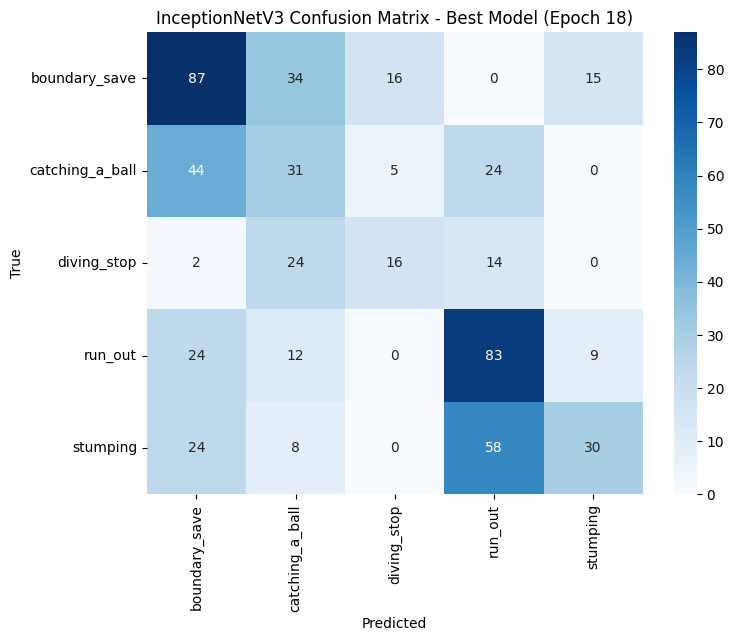

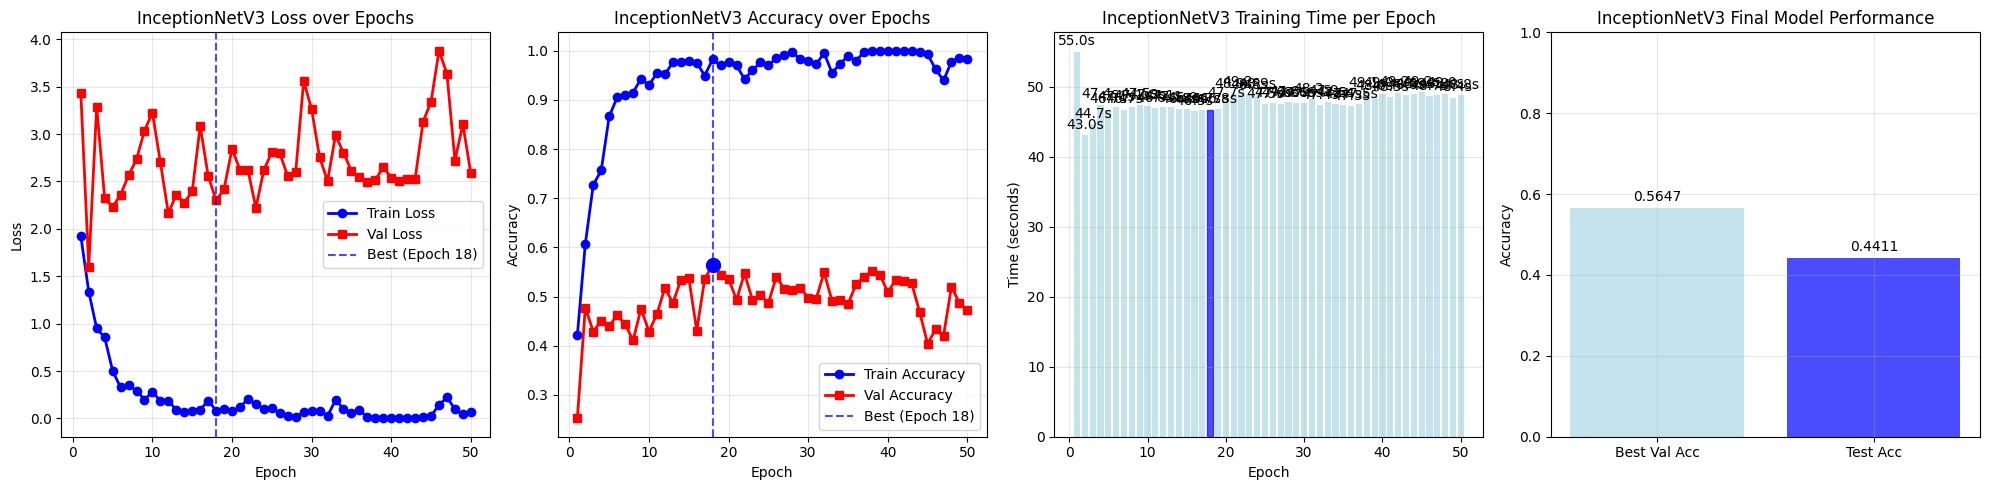


⏰ InceptionNetV3 Final Timing Summary:
│ Total Training: 2391.84s
│ Average per Epoch: 47.84s
│ Testing Time: 11.74s
│ Total Runtime: 2403.58s

💾 InceptionNetV3 Files saved:
│ best_inceptionnetv3_model.pth - Best validation accuracy model
│ inceptionnetv3_training_history.csv - Training metrics for later plotting


In [9]:
# -----------------------------
# 4. Training Loop with Best Model Saving (Val Accuracy) - InceptionNetV3
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking
best_val_acc = 0.0
best_model_state = None
best_epoch = 0

print(f"\n🚀 Starting InceptionNetV3 Training for {epochs} epochs...")
print("=" * 80)

total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc=f"Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        # Resize images to 299x299 for InceptionV3
        imgs = F.interpolate(imgs, size=(299, 299), mode='bilinear', align_corners=False)
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        # Handle auxiliary output during training
        if model.aux_logits and model.training:
            outputs, aux_outputs = model(imgs)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux_outputs, labels)
            loss = loss1 + 0.4 * loss2  # Weight auxiliary loss by 0.4
        else:
            outputs = model(imgs)
            loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',  
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc=f"Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            # Resize images to 299x299 for InceptionV3
            imgs = F.interpolate(imgs, size=(299, 299), mode='bilinear', align_corners=False)
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model so far based on val_acc
    is_best = val_acc > best_val_acc
    if is_best:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best InceptionNetV3 model found! Validation Accuracy: {val_acc:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Acc: {best_val_acc:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_inceptionnetv3_model.pth')
    print(f"\n💾 Best InceptionNetV3 model saved as 'best_inceptionnetv3_model.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history data to CSV
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}
history_df = pd.DataFrame(history_data)
history_df.to_csv('inceptionnetv3_training_history.csv', index=False)
print("\n💾 InceptionNetV3 training history saved to 'inceptionnetv3_training_history.csv'")

# Training Summary
print(f"\n🎉 InceptionNetV3 Training Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")
print("\n⏱️  Epoch Timing Breakdown:")
for i, t in enumerate(epoch_times):
    print(f"│ Epoch {i+1}: {t:.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best InceptionNetV3 Model for Testing...")

# Load the best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best InceptionNetV3 model from epoch {best_epoch} loaded successfully!")
else:
    print("⚠️  No best model found, using current model state")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()

test_pbar = tqdm(test_loader, desc="Testing InceptionNetV3", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        # Resize images to 299x299 for InceptionV3
        imgs = F.interpolate(imgs, size=(299, 299), mode='bilinear', align_corners=False)
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ InceptionNetV3 Testing completed in {test_time:.2f}s")
print("\n📋 InceptionNetV3 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
print(f"🎯 InceptionNetV3 Test Accuracy: {test_accuracy:.4f}")

# Model Performance Summary
print(f"\n📊 InceptionNetV3 Model Performance Summary:")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"InceptionNetV3 Confusion Matrix - Best Model (Epoch {best_epoch})")
plt.show()

# -----------------------------
# 6. Enhanced Visualizations
# -----------------------------
plt.figure(figsize=(20, 5))

# Loss Plot
plt.subplot(1, 4, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.legend()
plt.title("InceptionNetV3 Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 4, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='blue', s=100, zorder=5)
plt.legend()
plt.title("InceptionNetV3 Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Timing Plot
plt.subplot(1, 4, 3)
bars = plt.bar(range(1, epochs+1), epoch_times, color='lightblue', alpha=0.7)
bars[best_epoch-1].set_color('blue')
plt.title("InceptionNetV3 Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, alpha=0.3)
for i, t in enumerate(epoch_times):
    plt.text(i+1, t+0.5, f'{t:.1f}s', ha='center', va='bottom')

# Performance Comparison
plt.subplot(1, 4, 4)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['lightblue', 'blue']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("InceptionNetV3 Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n⏰ InceptionNetV3 Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")

print(f"\n💾 InceptionNetV3 Files saved:")
print(f"│ best_inceptionnetv3_model.pth - Best validation accuracy model")
print(f"│ inceptionnetv3_training_history.csv - Training metrics for later plotting")